# <font color="blue">DA514 - Homework Assignment 1</font>

Assigned: February 11th, 2021<br>
Due: **February 18th, 2021 23:55pm**

Please use this notebook for your answers. Add your charts/graphs/code where necessary. You can select the "Markdown" mode from the drop-down menu above and type your answer/reasoning there. It would be extra nice if you can use equations. The notebooks we provided have numerous examples. you can also check the following link for the Markdown formula: http://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/

### Requirements (very important):
1. Please use **this notebook** to answer the questions. If you work on Colab, you can download your notebook and use it for submission.


2. Please name your notebook as **`lastName_firstName_HW1.ipynb`** and upload it to SuCourse+ on time.


3. Don't send your work in HTML format. Because we must be able to run your code if need be. Don't send it in the **`.py`** format either. They won't be processed.  


4. Please work alone.

### Fatma Betül Özgün- Homework 1

# Predicting the onset of diabetes on Pima Indians within 5 years

The population for this study was the Pima Indian population near Phoenix, Arizona. The population has been under continuous study since 1965 by the National Institute of Diabetes and Digestive and Kidney Diseases because of its high incidence rate of diabetes.

For the purposes of this dataset, diabetes was diagnosed according to World Health Organization Criteria, which stated that if the 2 hour post-load glucose was at least 200 mg/dl at any survey exam or if the Indian Health Service Hospital serving the community found a glucose concentration of at least 200 mg/dl during the course of routine medical care.

Given the medical data we can gather about people, we should be able to make better predictions on how likely a person is to suffer the onset of diabetes, and therefore act appropriately to help.

This is a dataset to make predictions on whether a person is to suffer the diabetes given the 8 attributes. All patients in this dataset are females at least 21 years old of Pima Indian heritage. 

We have 537 instances in the train set (pima_train.csv) and 231 instances in the test set (pima_test.csv) with 8 attributes. 

**Pima Indians Diabetes Dataset attribute information:**

|Feature|Explanation|
|--|--|
|numpreg|Number of times pregnant|
|pgc|Plasma glucose concentration after 2 hours in an oral glucose tolerance test|
|bldpres|Diastolic blood pressure (mm Hg)|
|triceps|Triceps skin fold thickness (mm)|
|serumins|2-Hour serum insulin (mu U/ml)|
|bmi|Body mass index (weight in kg/(height in m)^2)|
|pedig|Diabetes pedigree function|
|age|Age (years)|
|target|Class variable (0 or 1) : 1 is interpreted as "tested positive" for diabetes|

A particularly interesting attribute used in the study was the Diabetes Pedigree Function, **pedi** which represents how likely they are to get the disease by extrapolating from their ancestor’s history. It provides information on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient. This measure of genetic influence gives us an idea of the hereditary risk one might have with the onset of diabetes mellitus.

### Questions:
Use a Logistic Regression classifier to predict the target in the test data. There are, however, missing values in the data files. Build your best model and identify the imputation method which gives you the highest classification accuracy. Try imputing the missing values by using:
1. mean/median imputation whichever is more appropriate
2. the predictive methods in the Iterative Imputer of scikit-learn   
3. a variable to indicate missingness

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 
from sklearn import model_selection
from sklearn.preprocessing import binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, precision_recall_curve
from sklearn.metrics import f1_score, fbeta_score, accuracy_score, classification_report, average_precision_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as pipe_imb
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('pima_train.csv') 
df.head() 

,numpreg,pgc,bldpres,triceps,serumins,bmi,pedig,age,target
0,4,151.0,90.0,38.0,NaN,29.7,0.294,36,0
1,4,116.0,72.0,12.0,87.0,22.1,0.463,37,0
2,6,92.0,62.0,32.0,126.0,32.0,0.085,46,0
3,9,57.0,80.0,37.0,NaN,32.8,0.096,41,0
4,3,81.0,86.0,16.0,66.0,27.5,0.306,22,0


In [28]:
df_test = pd.read_csv('pima_test.csv') 
df_test.head()

,numpreg,pgc,bldpres,triceps,serumins,bmi,pedig,age,target
0,4,154.0,62.0,31.0,284.0,32.8,0.237,23,0
1,6,134.0,70.0,23.0,130.0,35.4,0.542,29,1
2,4,118.0,70.0,NaN,NaN,44.5,0.904,26,0
3,5,162.0,104.0,NaN,NaN,37.7,0.151,52,1
4,0,102.0,86.0,17.0,105.0,29.3,0.695,27,0


In [38]:
y_train = df1['target']
X_train = df1.drop('target', axis=1)
y_test = df1_test['target']
X_test = df1_test.drop('target', axis=1)

In [39]:
cat_attrs = X_train.columns[X_train.dtypes == 'object'].tolist()
num_attrs = X_train.columns[X_train.dtypes != 'object'].tolist()


pipe_num = Pipeline([
            ("imp", SimpleImputer(strategy="median")),
            #("iter_imp", IterativeImputer(estimator=nei.KNeighborsRegressor())),
            ("scale", StandardScaler())
])

pipe_cat = Pipeline([
          #("imp", imp.SimpleImputer(strategy="most_frequent")),
          ("imp", SimpleImputer(strategy="constant",fill_value="Unknown")),
          ("onehot", pre.OneHotEncoder(handle_unknown="ignore", sparse=False)),
   
])

ct_global = com.ColumnTransformer([
              ("ct_num", pipe_num,num_attrs),
              ("ct_cat", pipe_cat,cat_attrs)
])

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
pipe_random_forest = Pipeline([          
            ("ct_global", ct_global),
             ("rf",RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=100))
])

myParams_random_forest = {
    #"rf__criterion":["gini","entropy"] ,
    #"rf__max_features": ["auto","sqrt","log2","None"],
    "rf__max_depth": [15,17,20],
    "rf__min_samples_split": [10,12,15],
    "rf__min_samples_leaf":  [3,5,7]
}
kfold = StratifiedKFold(n_splits = 5, random_state = 42)
grid = GridSearchCV(pipe_random_forest,myParams_random_forest, scoring="f1_weighted", cv=kfold, n_jobs=-1)
grid.fit(X_train, y_train) 
y_pred = grid.best_estimator_.predict(X_test)


print("Train f1-score for decision tree:",grid.best_score_)
print("Test f1-score for decision tree:", f1_score(y_test,y_pred,average="weighted"))
print("Test accuracy score for decision tree is: ", accuracy_score(y_test,y_pred))

KeyboardInterrupt: 

In [35]:
df.shape

(537, 9)

In [36]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   numpreg   537 non-null    int64  
 1   pgc       532 non-null    float64
 2   bldpres   512 non-null    float64
 3   triceps   391 non-null    float64
 4   serumins  294 non-null    float64
 5   bmi       527 non-null    float64
 6   pedig     537 non-null    float64
 7   age       537 non-null    int64  
 8   target    537 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 37.9 KB


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
numpreg,537.0,3.919926,3.350083,0.000,1.000,3.000,6.000,17.00
pgc,532.0,121.421053,30.119276,57.000,99.000,117.000,139.000,198.00
bldpres,512.0,72.003906,12.180636,30.000,64.000,72.000,80.000,110.00
triceps,391.0,28.785166,10.018183,7.000,21.000,29.000,36.000,63.00
serumins,294.0,152.670068,117.592444,14.000,74.250,125.000,184.750,846.00
bmi,527.0,32.386148,6.996717,18.200,27.300,32.400,36.600,67.10
pedig,537.0,0.483348,0.335318,0.078,0.254,0.395,0.637,2.42
age,537.0,33.132216,11.787263,21.000,24.000,29.000,40.000,81.00
target,537.0,0.348231,0.476854,0.000,0.000,0.000,1.000,1.00


In [38]:
df_test = pd.read_csv('pima_test.csv') 
df_test.head()

,numpreg,pgc,bldpres,triceps,serumins,bmi,pedig,age,target
0,4,154.0,62.0,31.0,284.0,32.8,0.237,23,0
1,6,134.0,70.0,23.0,130.0,35.4,0.542,29,1
2,4,118.0,70.0,NaN,NaN,44.5,0.904,26,0
3,5,162.0,104.0,NaN,NaN,37.7,0.151,52,1
4,0,102.0,86.0,17.0,105.0,29.3,0.695,27,0


In [39]:
df_test.shape

(231, 9)

In [40]:
df_test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   numpreg   231 non-null    int64  
 1   pgc       231 non-null    float64
 2   bldpres   221 non-null    float64
 3   triceps   150 non-null    float64
 4   serumins  100 non-null    float64
 5   bmi       230 non-null    float64
 6   pedig     231 non-null    float64
 7   age       231 non-null    int64  
 8   target    231 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 16.4 KB


# Exploratory Data Analysis

target
0    350
1    187
dtype: int64


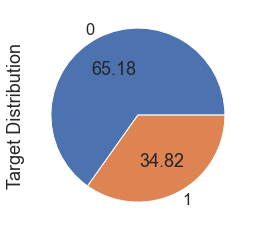

In [41]:
#Class Distribution  
plt.figure(figsize=(14,4))
plt.subplot(131)
class_orig = df.groupby('target').size()
class_orig.name = 'Target Distribution'
class_orig.plot.pie(autopct='%.2f');

print(df.groupby('target').size()) 

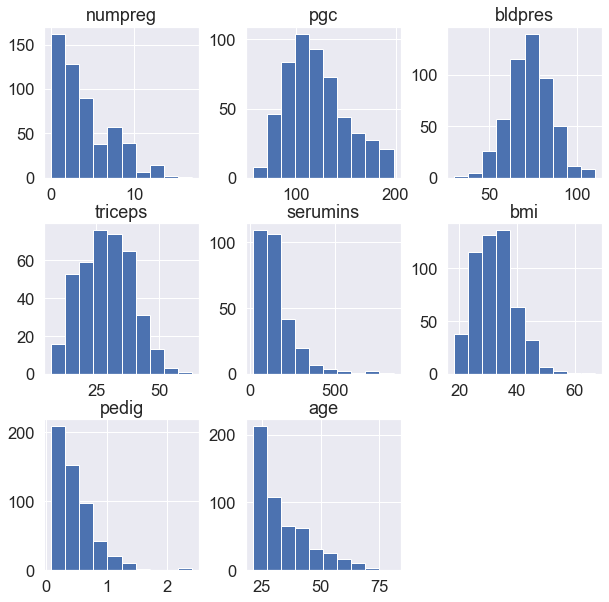

In [420]:
# Distributions of attributes
df_hist = ['numpreg','pgc','bldpres','triceps','serumins','bmi','pedig','age']
df[df_hist].hist(figsize = [10,10]);

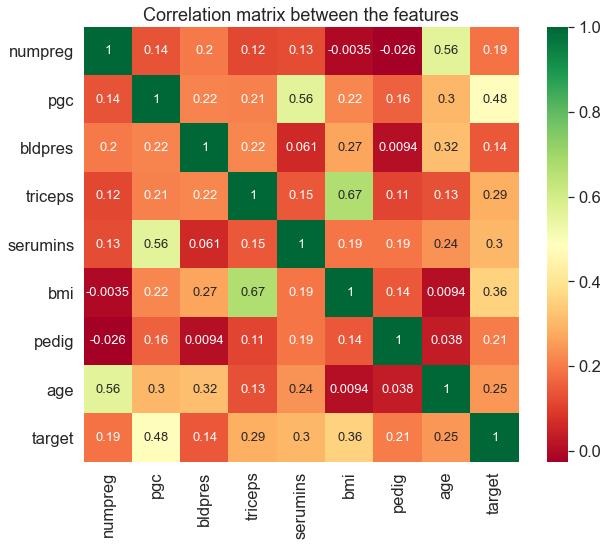

In [421]:
#Creating correlation matrix 
sns.set(font_scale=1.5)  
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='RdYlGn',annot_kws={'size': 13})
plt.title('Correlation matrix between the features')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

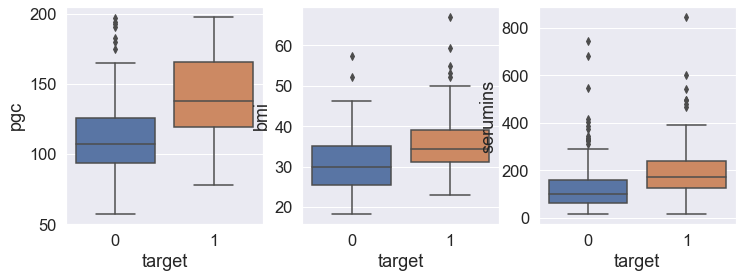

In [422]:
#Creating box plot for pgc, bmi, serumins
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(x='target', y='pgc', data=df)
plt.subplot(1,3,2)
sns.boxplot(x='target', y='bmi', data=df)
plt.subplot(1,3,3)
sns.boxplot(x='target', y='serumins', data=df)
plt.show()

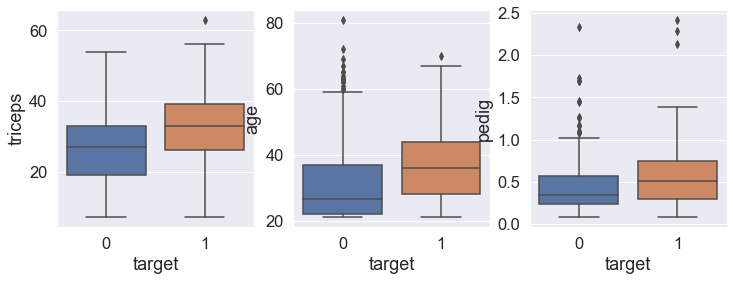

In [423]:
#Creating box plot for triceps, age, pedig 
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(x='target', y='triceps', data=df)
plt.subplot(1,3,2)
sns.boxplot(x='target', y='age', data=df)
plt.subplot(1,3,3)
sns.boxplot(x='target', y='pedig', data=df)
plt.show()

<AxesSubplot:xlabel='target', ylabel='bldpres'>

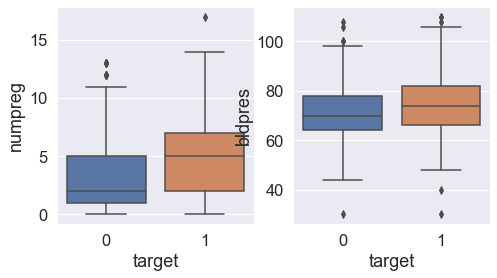

In [424]:
#Creating box plot for triceps, age, pedig 
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(x='target', y='numpreg', data=df)
plt.subplot(1,3,2)
sns.boxplot(x='target', y='bldpres', data=df)

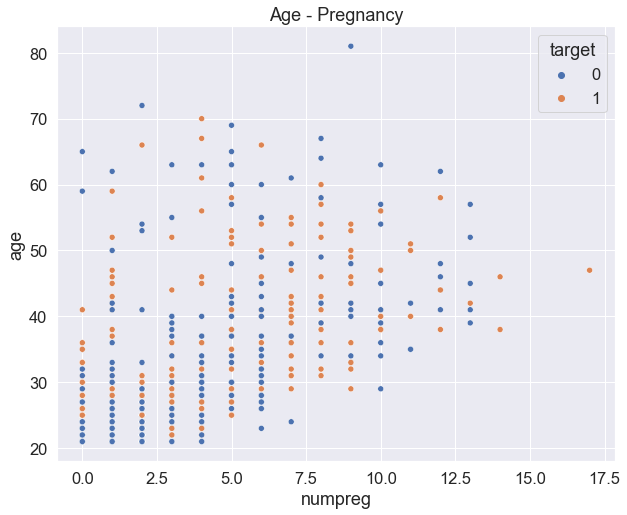

In [459]:
#Relationship between number of pregnancy and age 
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="numpreg", y="age", hue="target");
plt.title('Age - Pregnancy')
plt.show()

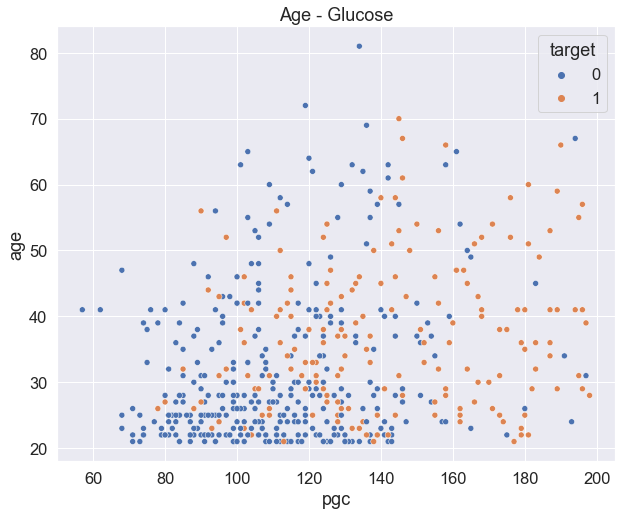

In [426]:
#Relationship between glucose and age
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="pgc", y="age", hue="target");
plt.title('Age - Glucose')
plt.show()

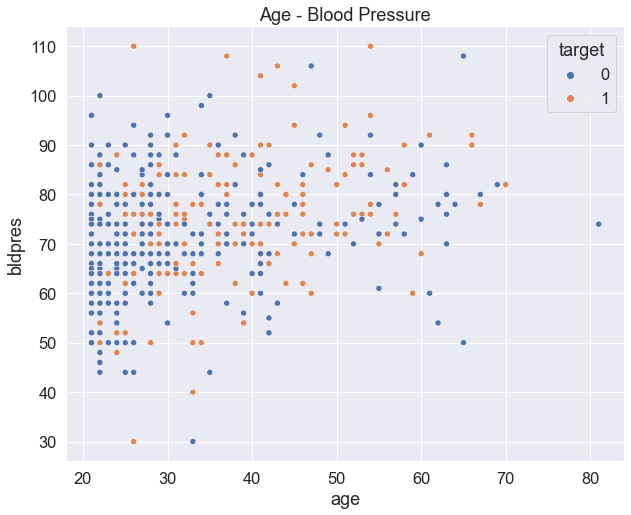

In [427]:
#Relationship between blood pressure and age
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="age", y="bldpres", hue="target");
plt.title('Age - Blood Pressure')
plt.show()

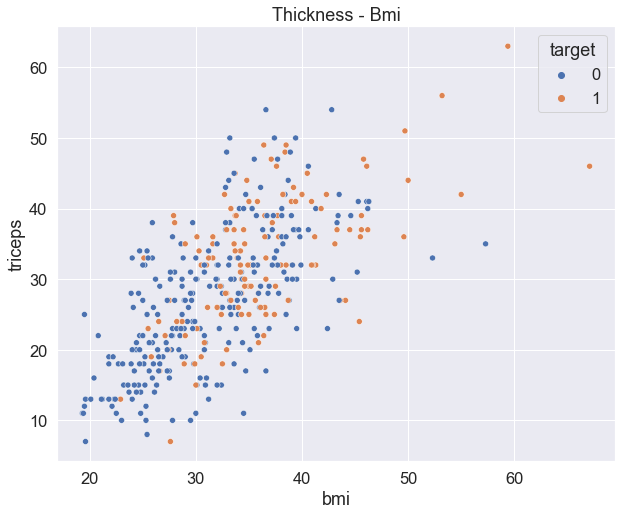

In [428]:
#Relationship between bmi and skin fold thickness
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="bmi", y="triceps", hue="target");
plt.title('Thickness - Bmi')
plt.show()

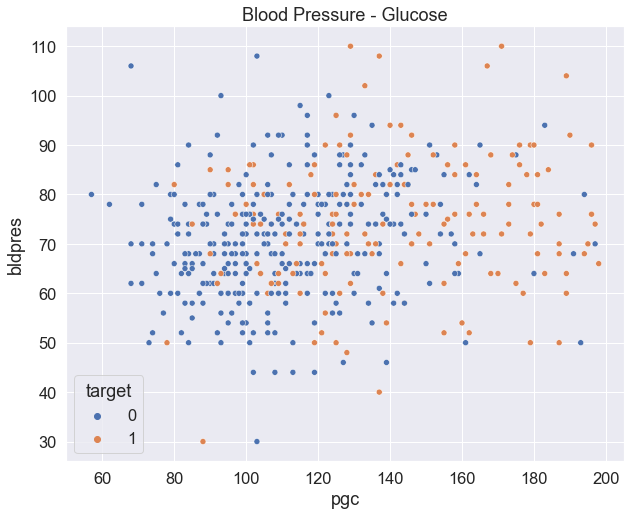

In [461]:
#Relationship between bmi and blood pressure
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="pgc", y="bldpres", hue="target");
plt.title('Blood Pressure - Glucose')
plt.show()

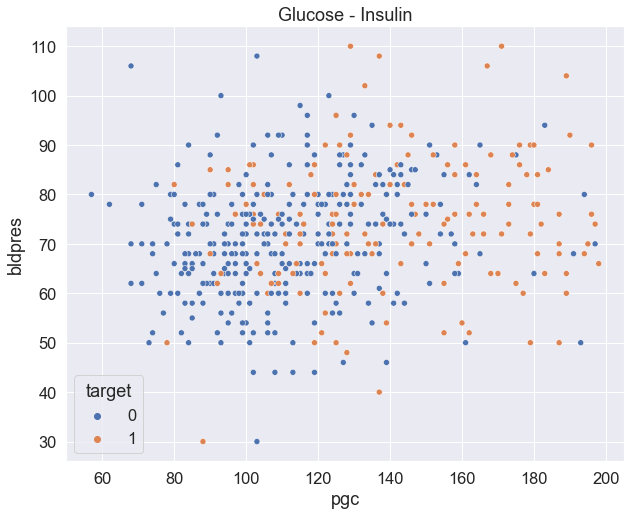

In [430]:
#Relationship between glucose ve insulin 
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="pgc", y="bldpres", hue="target");
plt.title('Glucose - Insulin')
plt.show()

### Highlights of Data Analysis

*Out of 537 instances, number of people tested negative is 350 (65.18%), tested positive is 187 (34.82%). 
We have a somewhat unbalanced data set.

*As it can be seen from histograms, distribution of attributes are generally right-skewed.

*According to information that we interpret from box plots, all features seem to make a difference in triggering diabetes. 

*Healthy people are concentrated with an age <= 25 and pregnancies <= 5. 

*People who tested negative are contentrated with an age <= 30 and glucose <= 120. 

*People are more likely to get diabetes when BMI is more than 30 and skin thickness is more than 20.

*People are also more likely to get diabetes when blood pressure is more than 80 and level of glucose is more than 100.

# Dealing with Missing Values

# 1) Mean/median imputation 

In [431]:
#Deciding whether our data has missing value or not 
df.isnull().values.any()

True

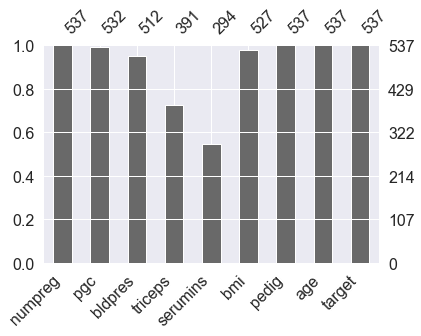

In [432]:
#Creating bar chart for missing values.
msno.bar(df, figsize=(6,4));

#Bldpres, triceps, serumins, bmi contains missing values. 

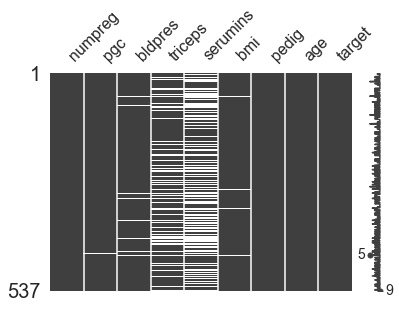

In [433]:
#Creating chart for missing values.
msno.matrix(df,figsize=(6,4));

In [434]:
#Number of missing values for each feature 
missing = df.isnull().sum().sort_values(ascending = False)
missing = missing.reset_index()
missing.columns = ['Features', 'Missing']
gtz = missing['Missing'] > 0
missing = missing[gtz]
missing

,Features,Missing
0,serumins,243
1,triceps,146
2,bldpres,25
3,bmi,10
4,pgc,5


 Building The Model

In [14]:
df1= df.copy()
df1_test= df_test.copy() 
y_train = df1['target']
X_train = df1.drop('target', axis=1)
y_test = df1_test['target']
X_test = df1_test.drop('target', axis=1)

In [15]:
from sklearn import neighbors as nei

In [16]:
from sklearn import compose as com

In [17]:
from sklearn import preprocessing as pre

In [18]:
cat_attrs = X_train.columns[X_train.dtypes == 'object'].tolist()
num_attrs = X_train.columns[X_train.dtypes != 'object'].tolist()


pipe_num = Pipeline([
            #("imp", imp.SimpleImputer(strategy="median")),
            ("iter_imp", IterativeImputer(estimator=nei.KNeighborsRegressor())),
            ("scale", StandardScaler())
])

pipe_cat = Pipeline([
          #("imp", imp.SimpleImputer(strategy="most_frequent")),
          ("imp", SimpleImputer(strategy="constant",fill_value="Unknown")),
          ("onehot", pre.OneHotEncoder(handle_unknown="ignore", sparse=False)),
   
])

ct_global = com.ColumnTransformer([
              ("ct_num", pipe_num,num_attrs),
              ("ct_cat", pipe_cat,cat_attrs)
])

In [21]:
pipe_knn = Pipeline([("ct_global", ct_global),
                     ('clf', KNeighborsClassifier())])

params_knn = [{'clf__n_neighbors': np.arange(1, 30, 2), 
           'clf__weights'    : ['uniform', 'distance'], 
           'clf__p'          : [1, 2]} ] # 1=Manhattan, 2=Euclidean

kfold = StratifiedKFold(n_splits = 5, random_state = 42)
grid = GridSearchCV(pipe_knn, params_knn, scoring="f1_weighted", cv=kfold, n_jobs=-1)
grid.fit(X_train, y_train)
y_pred = grid.best_estimator_.predict(X_test)

print("Train f1-score for kNN:",grid.best_score_)
print("Test f1-score for kNN:", f1_score(y_test,y_pred,average="weighted"))
print("Test accuracy score for kNN is: ", accuracy_score(y_test,y_pred))

KeyboardInterrupt: 

In [13]:
#I choose median imputation because the distribution of the features are generally right skewed.  

#Default Logistic 
pipe = Pipeline([("ct_global", ct_global),
                 ('clf',     LogisticRegression(random_state=42))])

paramsl1 = [{'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga']}]
          
         # {'clf__C'           : np.arange(0.1, 2.0, 0.05), 
          # 'clf__penalty'     : ['l2'], 
          # 'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}]

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
grid = GridSearchCV(pipe, param_grid=paramsl1, cv=skf, n_jobs=-1 , verbose=1, scoring="f1_weighted")

grid.fit(X_train, y_train)
y_pred = grid.best_estimator_.predict(X_test)

print("Train f1-score for default logistic:",grid.best_score_)
print("Test f1-score for default logistic:", f1_score(y_test,y_pred,average="weighted"))
print("Test accuracy score for logistic l2 is: ", accuracy_score(y_test,y_pred))

Fitting 5 folds for each of 76 candidates, totalling 380 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 380 out of 380 | elapsed:  2.3min finished


Train f1-score for default logistic: 0.7703235471185097
Test f1-score for default logistic: 0.7495827986975903
Test accuracy score for logistic l2 is:  0.7532467532467533


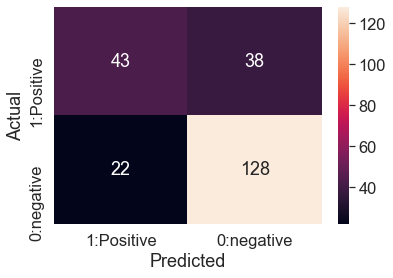


               precision    recall  f1-score   support

           0       0.77      0.85      0.81       150
           1       0.66      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



In [437]:
#Confusion matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted, [1,0])
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["1:Positive", "0:negative"] , 
                yticklabels = ["1:Positive", "0:negative"] )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
draw_cm( y_test, grid.predict(X_test) )
print('\n',classification_report(y_test, grid.predict(X_test)))

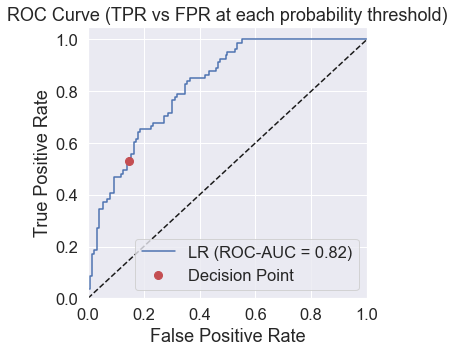

In [438]:
#Creating ROC Curve 
cm = confusion_matrix(y_test, grid.predict(X_test))
# Determine the false positive and true positive rates for ROC
fpr, tpr, _ = roc_curve(y_test, grid.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='LR (ROC-AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
tn, fp, fn, tp = [i for i in cm.ravel()]
plt.plot(fp/(fp+tn), tp/(tp+fn), 'ro', markersize=8, label='Decision Point')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (TPR vs FPR at each probability threshold)')
plt.legend(loc="lower right")
plt.show()

In [443]:
#I also used SMOTEENN_pipe due to the unbalanced data set. However, test accuracy does not change. 

SMOTEENN_pipe = pipe_imb(steps=[('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                           ('scaler',  StandardScaler()),
                           ('sampler', SMOTEENN(enn=EditedNearestNeighbours(), random_state=42)),
                           ('clf', LogisticRegression(random_state=42))])

params = [{'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga'],
           'sampler__sampling_strategy': [0.6, 0.7, 0.8, 1.0],
           'sampler__enn__n_neighbors': [5, 7, 8, 9,10] },
          
          {'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
           'sampler__sampling_strategy': [0.6, 0.7, 0.8, 1.0],
           'sampler__enn__n_neighbors': [5, 7, 8, 9,10]},
         ]

kfold = StratifiedKFold(n_splits = 5, random_state = 42) # train/validation with the same ratio of classes

grids = GridSearchCV(SMOTEENN_pipe, param_grid=params, cv=kfold, n_jobs=-1 , verbose=1)

grids.fit(X_train, y_train)

print(grids.best_estimator_,'\n')
test_score = grids.score(X_test, y_test)
print('Training accuracy:', grids.score(X_train, y_train))
print('Test accuracy    :', test_score)

Fitting 5 folds for each of 5320 candidates, totalling 26600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 2976 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 5776 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 9376 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 13776 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 18976 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 24976 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 26600 out of 26600 | elapsed:  3.8min finished


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('sampler',
                 SMOTEENN(enn=EditedNearestNeighbours(n_neighbors=5),
                          random_state=42, sampling_strategy=1.0)),
                ('clf',
                 LogisticRegression(C=0.3500000000000001, random_state=42,
                                    solver='newton-cg'))]) 

Training accuracy: 0.770949720670391
Test accuracy    : 0.7489177489177489


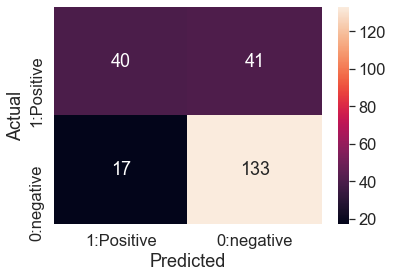


               precision    recall  f1-score   support

           0       0.76      0.89      0.82       150
           1       0.70      0.49      0.58        81

    accuracy                           0.75       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231



In [444]:
draw_cm( y_test, grids.predict(X_test) )
print('\n',classification_report(y_test, grids.predict(X_test)))

# 2) Iterative Imputer of Scikit-learn

## a-Bayesian Ridge

Building the Model 

In [446]:
df2= df.copy()
df2_test= df_test.copy() 
y_train = df2['target']
X_train = df2.drop('target', axis=1)
y_test = df2_test['target']
X_test = df2_test.drop('target', axis=1)

In [448]:
pipe = Pipeline([('imputer', IterativeImputer()),
                 ('scaler',  StandardScaler()),
                 ('clf',     LogisticRegression(random_state=seed))])

params = [{'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga']},
          
          {'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}]

skf = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)
grid = GridSearchCV(pipe, param_grid=params, cv=skf, n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)
print('Best grid parameters:', grid.best_params_, '\n')
print('Classifier used     :',grid.best_estimator_,'\n')
print('Training accuracy:', grid.score(X_train, y_train))
print('Test accuracy:', grid.score(X_test, y_test))

Fitting 5 folds for each of 266 candidates, totalling 1330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   17.3s


Best grid parameters: {'clf__C': 0.20000000000000004, 'clf__penalty': 'l1', 'clf__solver': 'saga'} 

Classifier used     : Pipeline(steps=[('imputer', IterativeImputer()), ('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(C=0.20000000000000004, penalty='l1',
                                    random_state=42, solver='saga'))]) 

Training accuracy: 0.7877094972067039
Test accuracy: 0.7359307359307359


[Parallel(n_jobs=-1)]: Done 1330 out of 1330 | elapsed:   27.2s finished


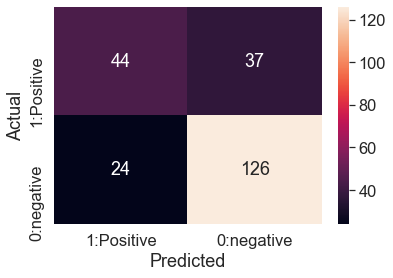


               precision    recall  f1-score   support

           0       0.77      0.84      0.81       150
           1       0.65      0.54      0.59        81

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



In [450]:
#Confusion matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted, [1,0])
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["1:Positive", "0:negative"] , 
                yticklabels = ["1:Positive", "0:negative"] )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
draw_cm( y_test, grid.predict(X_test) )
print('\n',classification_report(y_test, grid.predict(X_test)))

## b-DecisionTreeRegressor

Building the Model

In [453]:
pipe = Pipeline([('imputer', IterativeImputer(random_state=42,
                                              estimator=DecisionTreeRegressor(max_features='sqrt', random_state=0))),
                 ('scaler',  StandardScaler()),
                 ('clf',     LogisticRegression(random_state=42))])

params = [{'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga']},
          
          {'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}]

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
grid = GridSearchCV(pipe, param_grid=params, cv=skf, n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)
print('Best grid parameters:', grid.best_params_, '\n')
print('Classifier used     :',grid.best_estimator_,'\n')
print('Training accuracy:', grid.score(X_train, y_train))
print('Test accuracy:', grid.score(X_test, y_test))

Fitting 5 folds for each of 266 candidates, totalling 1330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1330 out of 1330 | elapsed:  1.4min finished


Best grid parameters: {'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'saga'} 

Classifier used     : Pipeline(steps=[('imputer',
                 IterativeImputer(estimator=DecisionTreeRegressor(max_features='sqrt',
                                                                  random_state=0),
                                  random_state=42)),
                ('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(C=0.1, penalty='l1', random_state=42,
                                    solver='saga'))]) 

Training accuracy: 0.7877094972067039
Test accuracy: 0.7445887445887446


## c-KNeighborsRegressor

Building the Model

In [454]:
pipe = Pipeline([('imputer', IterativeImputer(random_state=42,
                                              estimator=KNeighborsRegressor())),
                 ('scaler',  StandardScaler()),
                 ('clf',     LogisticRegression(random_state=42))])

params = [{'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga'],
           'imputer__estimator__n_neighbors':[5,7,9,11]},
          
          {'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
           'imputer__estimator__n_neighbors':[5,7,9,11]}]

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
grid = GridSearchCV(pipe, param_grid=params, cv=skf, n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)
print('Best grid parameters:', grid.best_params_, '\n')
print('Classifier used     :',grid.best_estimator_,'\n')
print('Training accuracy:', grid.score(X_train, y_train))
print('Test accuracy:', grid.score(X_test, y_test))

Fitting 5 folds for each of 1064 candidates, totalling 5320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 5320 out of 5320 | elapsed:  7.0min finished


Best grid parameters: {'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'saga', 'imputer__estimator__n_neighbors': 7} 

Classifier used     : Pipeline(steps=[('imputer',
                 IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=7),
                                  random_state=42)),
                ('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(C=0.1, penalty='l1', random_state=42,
                                    solver='saga'))]) 

Training accuracy: 0.7914338919925512
Test accuracy: 0.7489177489177489


## d-ExtraTreesRegressor

Building the Model

In [456]:
pipe = Pipeline([('imputer', IterativeImputer(random_state=42,
                                              estimator=ExtraTreesRegressor(n_estimators=10, random_state=42))),
                 ('scaler',  StandardScaler()),
                 ('clf',     LogisticRegression(random_state=42))])

params = [{'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga']},
          
          {'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}]

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
grid = GridSearchCV(pipe, param_grid=params, cv=skf, n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)
print('Best grid parameters:', grid.best_params_, '\n')
print('Classifier used     :',grid.best_estimator_,'\n')
print('Training accuracy:', grid.score(X_train, y_train))
print('Test accuracy:', grid.score(X_test, y_test))

Fitting 5 folds for each of 266 candidates, totalling 1330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 1330 out of 1330 | elapsed: 18.7min finished


Best grid parameters: {'clf__C': 0.25000000000000006, 'clf__penalty': 'l1', 'clf__solver': 'saga'} 

Classifier used     : Pipeline(steps=[('imputer',
                 IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10,
                                                                random_state=42),
                                  random_state=42)),
                ('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(C=0.25000000000000006, penalty='l1',
                                    random_state=42, solver='saga'))]) 

Training accuracy: 0.7839851024208566
Test accuracy: 0.7316017316017316


# 3) Variable to Indicate Missingness

In [69]:
df3= df.copy()
df3_test= df_test.copy()

In [70]:
# Replace Nan Values with Zero- For Train Data 
df3['triceps_n'] = df3['triceps'].replace(np.nan,0)
df3['bld_n'] = df3['bldpres'].replace(np.nan,0)
df3['bmi_n'] = df3['bmi'].replace(np.nan,0)
df3['ins_n'] = df3['serumins'].replace(np.nan,0)
df3['pgc_n'] = df3['pgc'].replace(np.nan,0)
df3.head()

,numpreg,pgc,bldpres,triceps,serumins,bmi,pedig,age,target,triceps_n,bld_n,bmi_n,ins_n,pgc_n
0,4,151.0,90.0,38.0,NaN,29.7,0.294,36,0,38.0,90.0,29.7,0.0,151.0
1,4,116.0,72.0,12.0,87.0,22.1,0.463,37,0,12.0,72.0,22.1,87.0,116.0
2,6,92.0,62.0,32.0,126.0,32.0,0.085,46,0,32.0,62.0,32.0,126.0,92.0
3,9,57.0,80.0,37.0,NaN,32.8,0.096,41,0,37.0,80.0,32.8,0.0,57.0
4,3,81.0,86.0,16.0,66.0,27.5,0.306,22,0,16.0,86.0,27.5,66.0,81.0


In [71]:
#Creating new colums that only consists of 1 and 0 - For Train Data 
df3['triceps_new'] = [0 if x ==0 else 1 for x in df3.triceps_n]
df3['bldpres_new'] = [0 if x ==0 else 1 for x in df3.bld_n]
df3['bmi_new'] = [0 if x ==0 else 1 for x in df3.bmi_n]
df3['serumins_new'] = [0 if x ==0 else 1 for x in df3.ins_n]
df3['pgc_new'] = [0 if x ==0 else 1 for x in df3.pgc_n]

In [72]:
df3.drop(['triceps_n','bld_n','bmi_n','ins_n','pgc_n'], axis=1, inplace=True)

In [73]:
df3.head()

,numpreg,pgc,bldpres,triceps,serumins,bmi,pedig,age,target,triceps_new,bldpres_new,bmi_new,serumins_new,pgc_new
0,4,151.0,90.0,38.0,NaN,29.7,0.294,36,0,1,1,1,0,1
1,4,116.0,72.0,12.0,87.0,22.1,0.463,37,0,1,1,1,1,1
2,6,92.0,62.0,32.0,126.0,32.0,0.085,46,0,1,1,1,1,1
3,9,57.0,80.0,37.0,NaN,32.8,0.096,41,0,1,1,1,0,1
4,3,81.0,86.0,16.0,66.0,27.5,0.306,22,0,1,1,1,1,1


In [74]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   numpreg       537 non-null    int64  
 1   pgc           532 non-null    float64
 2   bldpres       512 non-null    float64
 3   triceps       391 non-null    float64
 4   serumins      294 non-null    float64
 5   bmi           527 non-null    float64
 6   pedig         537 non-null    float64
 7   age           537 non-null    int64  
 8   target        537 non-null    int64  
 9   triceps_new   537 non-null    int64  
 10  bldpres_new   537 non-null    int64  
 11  bmi_new       537 non-null    int64  
 12  serumins_new  537 non-null    int64  
 13  pgc_new       537 non-null    int64  
dtypes: float64(6), int64(8)
memory usage: 58.9 KB


In [75]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
numpreg,537.0,3.919926,3.350083,0.000,1.000,3.000,6.000,17.00
pgc,532.0,121.421053,30.119276,57.000,99.000,117.000,139.000,198.00
bldpres,512.0,72.003906,12.180636,30.000,64.000,72.000,80.000,110.00
triceps,391.0,28.785166,10.018183,7.000,21.000,29.000,36.000,63.00
serumins,294.0,152.670068,117.592444,14.000,74.250,125.000,184.750,846.00
bmi,527.0,32.386148,6.996717,18.200,27.300,32.400,36.600,67.10
pedig,537.0,0.483348,0.335318,0.078,0.254,0.395,0.637,2.42
age,537.0,33.132216,11.787263,21.000,24.000,29.000,40.000,81.00
target,537.0,0.348231,0.476854,0.000,0.000,0.000,1.000,1.00
triceps_new,537.0,0.728119,0.445344,0.000,0.000,1.000,1.000,1.00


In [76]:
# Replace Nan Values with Zero- For Test Data
df3_test['triceps_n'] = df3_test['triceps'].replace(np.nan,0)
df3_test['bld_n'] = df3_test['bldpres'].replace(np.nan,0)
df3_test['bmi_n'] = df3_test['bmi'].replace(np.nan,0)
df3_test['ins_n'] = df3_test['serumins'].replace(np.nan,0)
df3_test['pgc_n'] = df3_test['pgc'].replace(np.nan,0)
df3_test.head()

,numpreg,pgc,bldpres,triceps,serumins,bmi,pedig,age,target,triceps_n,bld_n,bmi_n,ins_n,pgc_n
0,4,154.0,62.0,31.0,284.0,32.8,0.237,23,0,31.0,62.0,32.8,284.0,154.0
1,6,134.0,70.0,23.0,130.0,35.4,0.542,29,1,23.0,70.0,35.4,130.0,134.0
2,4,118.0,70.0,NaN,NaN,44.5,0.904,26,0,0.0,70.0,44.5,0.0,118.0
3,5,162.0,104.0,NaN,NaN,37.7,0.151,52,1,0.0,104.0,37.7,0.0,162.0
4,0,102.0,86.0,17.0,105.0,29.3,0.695,27,0,17.0,86.0,29.3,105.0,102.0


In [77]:
#Creating new colums that only consists of 1 and 0 - For Test Data 
df3_test['triceps_new'] = [0 if x ==0 else 1 for x in df3_test.triceps_n]
df3_test['bldpres_new'] = [0 if x ==0 else 1 for x in df3_test.bld_n]
df3_test['bmi_new'] = [0 if x ==0 else 1 for x in df3_test.bmi_n]
df3_test['serumins_new'] = [0 if x ==0 else 1 for x in df3_test.ins_n]
df3_test['pgc_new'] = [0 if x ==0 else 1 for x in df3_test.pgc_n]

In [78]:
df3_test.drop(['triceps_n','bld_n','bmi_n','ins_n','pgc_n'], axis=1, inplace=True)

In [79]:
df3_test.head()

,numpreg,pgc,bldpres,triceps,serumins,bmi,pedig,age,target,triceps_new,bldpres_new,bmi_new,serumins_new,pgc_new
0,4,154.0,62.0,31.0,284.0,32.8,0.237,23,0,1,1,1,1,1
1,6,134.0,70.0,23.0,130.0,35.4,0.542,29,1,1,1,1,1,1
2,4,118.0,70.0,NaN,NaN,44.5,0.904,26,0,0,1,1,0,1
3,5,162.0,104.0,NaN,NaN,37.7,0.151,52,1,0,1,1,0,1
4,0,102.0,86.0,17.0,105.0,29.3,0.695,27,0,1,1,1,1,1


In [80]:
df3_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   numpreg       231 non-null    int64  
 1   pgc           231 non-null    float64
 2   bldpres       221 non-null    float64
 3   triceps       150 non-null    float64
 4   serumins      100 non-null    float64
 5   bmi           230 non-null    float64
 6   pedig         231 non-null    float64
 7   age           231 non-null    int64  
 8   target        231 non-null    int64  
 9   triceps_new   231 non-null    int64  
 10  bldpres_new   231 non-null    int64  
 11  bmi_new       231 non-null    int64  
 12  serumins_new  231 non-null    int64  
 13  pgc_new       231 non-null    int64  
dtypes: float64(6), int64(8)
memory usage: 25.4 KB


Building the Model

In [81]:
y_train = df3['target']
X_train = df3.drop('target', axis=1)
y_test = df3_test['target']
X_test = df3_test.drop('target', axis=1)

In [82]:
pipe = pipe_imb([('imputer', SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=850)),
                 ('scaler' , StandardScaler()),
                 ('clf',     LogisticRegression(random_state=42))])

params = [{'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga']},
          
          {'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}]

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
grid = GridSearchCV(pipe, param_grid=params, cv=skf, n_jobs=-1 , verbose=1)

grid.fit(X_train, y_train)

print(grid.best_estimator_,'\n')
test_score = grid.score(X_test, y_test)
print('Training accuracy:', grid.score(X_train, y_train))
print('Test accuracy    :', test_score)

Fitting 5 folds for each of 266 candidates, totalling 1330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   16.5s


Pipeline(steps=[('imputer', SimpleImputer(fill_value=850, strategy='constant')),
                ('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(C=1.6500000000000006, penalty='l1',
                                    random_state=42, solver='liblinear'))]) 

Training accuracy: 0.7970204841713222
Test accuracy    : 0.7619047619047619


[Parallel(n_jobs=-1)]: Done 1330 out of 1330 | elapsed:   23.8s finished


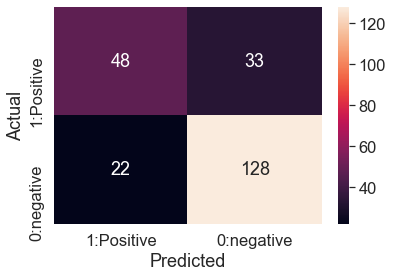


               precision    recall  f1-score   support

           0       0.80      0.85      0.82       150
           1       0.69      0.59      0.64        81

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231



In [83]:
#Confusion matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted, [1,0])
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["1:Positive", "0:negative"] , 
                yticklabels = ["1:Positive", "0:negative"] )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
draw_cm( y_test, grid.predict(X_test) )
print('\n',classification_report(y_test, grid.predict(X_test)))

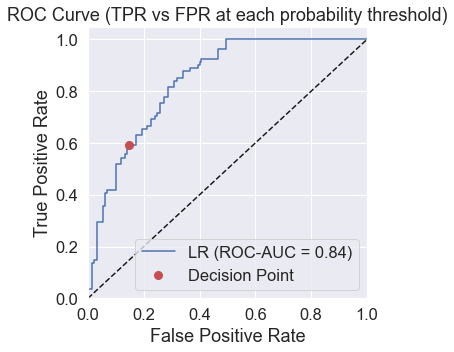

In [84]:
#Creating ROC Curve 
cm = confusion_matrix(y_test, grid.predict(X_test))
# Determine the false positive and true positive rates for ROC
fpr, tpr, _ = roc_curve(y_test, grid.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='LR (ROC-AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
tn, fp, fn, tp = [i for i in cm.ravel()]
plt.plot(fp/(fp+tn), tp/(tp+fn), 'ro', markersize=8, label='Decision Point')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (TPR vs FPR at each probability threshold)')
plt.legend(loc="lower right")
plt.show()

### Some Findings and Model Selection 

I implemented three imputation methods and decide to choose my model based on their classification accuracies. 
Here are some of the findings:

1) Mean/median imputation: Training accuracy is 0.78 and test accuracy is 0.74. The area under the ROC curve is 0.82. Also, recall score is 0.53. It seems that there is no overfitting or underfitting. 

2) Iterative Imputer of Scikit-learn: I used four estimators for Iterative Imputer of Scikit-learn. These are Bayesian Ridge,  DecisionTreeRegressor, KNeighborsRegressor and ExtraTreesRegressor. Even though train and test accuracies are very closed 
to each other, KNeighborsRegressor gives the highest accuracy. Its' training accuracy is 0.79 and test accuracy is 0.74.
It seems that there is no overfitting or underfitting. 

3) Variable to Indicate Missingness: Training accuracy is 0.79 and test accuracy is 0.76. The area under the ROC curve is 0.84. Also, recall score is 0.59. It seems that there is no overfitting or underfitting.

#### As a result, due to the highest accuracy, the area under the curve and recall score, I decide to implement my model with third method which is using variable to indicate missingness.